# seaborn
- Desigin to work with the pandas data frame
- Interacts well with matplotlib

In [183]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [176]:
# Data preparation
housing_df = pd.read_csv(
    '/Users/anand/learning/python/pylearn/notebooks/data/housing_data.csv', parse_dates=['period_begin', 'period_end'])
ca_housing = (
    housing_df
    .loc[(housing_df["region_name"].str.contains("CA"))]
    .assign(region_name=housing_df["region_name"].str[0:-11])
)
ca_housing_pivot = (ca_housing
                    .pivot_table(
                        index="period_begin",
                        columns="region_name",
                        values="median_active_list_price"
                    )
                    .loc[:,["San Francisco", "Los Angeles", "San Diego", "Tulare"]]
                    .assign(overall_avg=lambda x: x.mean(axis=1))
                )
ca_housing.head()


,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107.0,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529.0,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572.0,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102.0,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200.0,797.0,907.0,56.5,330049.9,9.744362


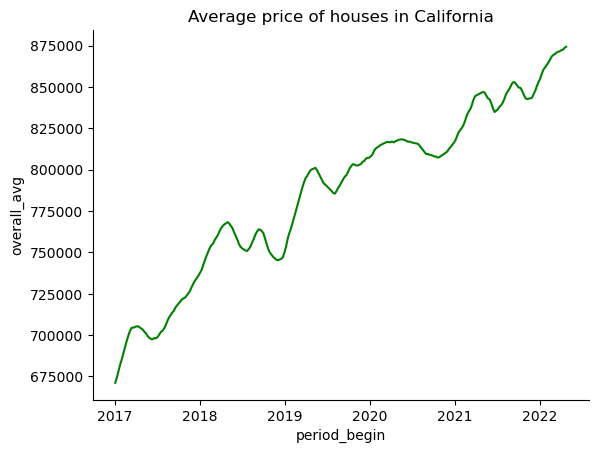

In [175]:
# you can apply chart formatting using the matplotlib arguments
# set the title
sns.lineplot(x=ca_housing_pivot.index, y="overall_avg", data=ca_housing_pivot,
             estimator=sum, color='green', errorbar=None).set_title('Average price of houses in California')
# remove the top and right borders
sns.despine()

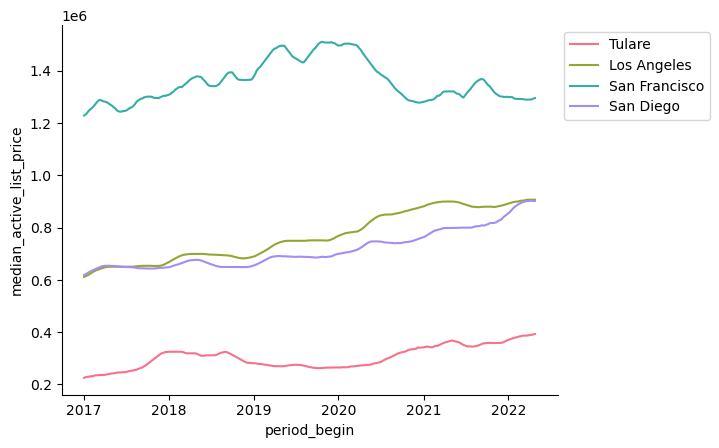

In [186]:
# hue => allows us to define a categorical variable
# palette => allows us to define the color palette
# errorbar => allows us to define the error bars
# estimator => allows us to define the aggregation function
# ls => allows us to define the line style 
sns.lineplot(
    x="period_begin",
    y="median_active_list_price",
    hue="region_name",
    data=ca_housing.query("region_name in ['San Francisco', 'Los Angeles', 'San Diego', 'Tulare']"),
    palette="husl",
    errorbar=None,
    estimator=sum,
    ls='-',
)
sns.despine()
plt.legend(bbox_to_anchor=(1, 1))

In [269]:
# Bar charts
# Bar charts are created using the sns.barplot() function
# x => defines the x-axis variable
# y => defines the y-axis variable
# data => defines the DataFrame

diamonds_df = pd.read_csv("/Users/anand/learning/python/pylearn/notebooks/data/Diamonds Prices2022.csv")
#diamonds_df.head()
# seaborn does an automatic grouping of the data with mean aggregation if we don't specify the estimator
sns.barplot(x="cut", y="carat", data=diamonds_df, estimator=sum, hue="cut", palette="husl", errorbar=None)
sns.despine()
plt.legend(bbox_to_anchor=(1, 1))

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: xlabel='carat', ylabel='cut'>

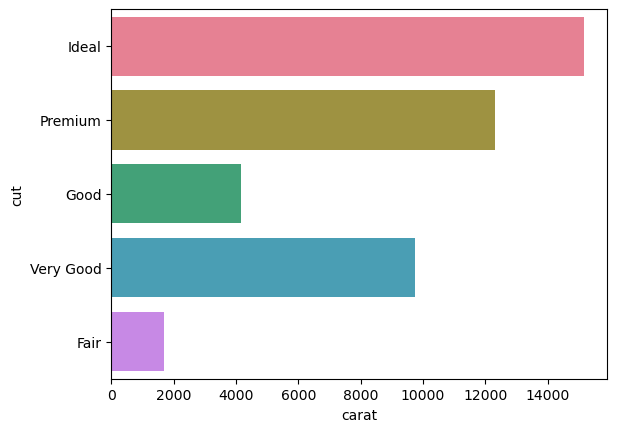

In [206]:
# horizontal bar chart
sns.barplot(x="carat", y="cut", data=diamonds_df, estimator=sum, palette="husl", errorbar=None)

<Axes: xlabel='cut', ylabel='carat'>

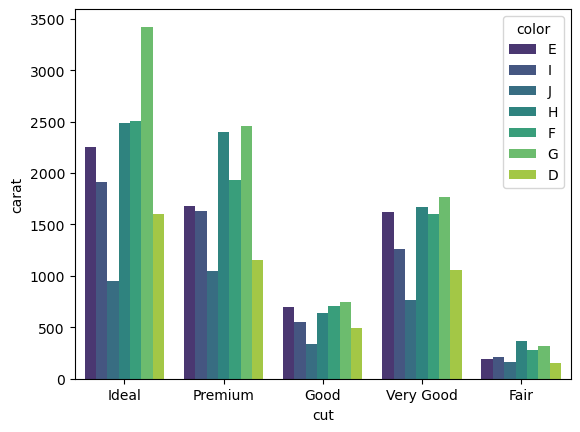

In [205]:
# grouped bar chart
sns.barplot(x="cut", y="carat", data=diamonds_df, estimator=sum, hue="color", palette="viridis", errorbar=None)

<Axes: xlabel='price', ylabel='Count'>

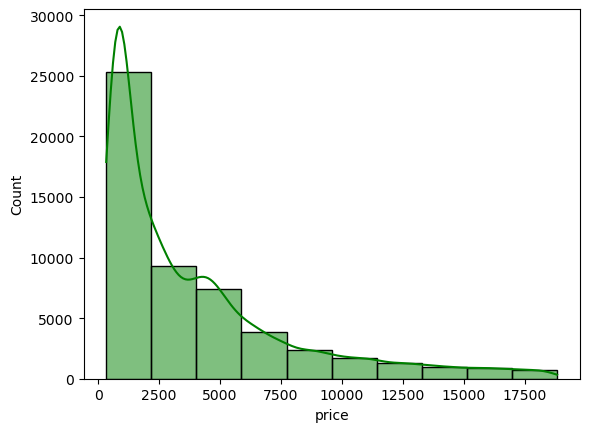

In [213]:
# Histograms
# Histograms are created using the sns.histplot() function
# x => defines the variable to be plotted
# data => defines the DataFrame
# bins => defines the number of bins
# kde => defines whether to plot the kernel density estimation

sns.histplot(x="price", data=diamonds_df, bins=10, kde=True, color="green")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


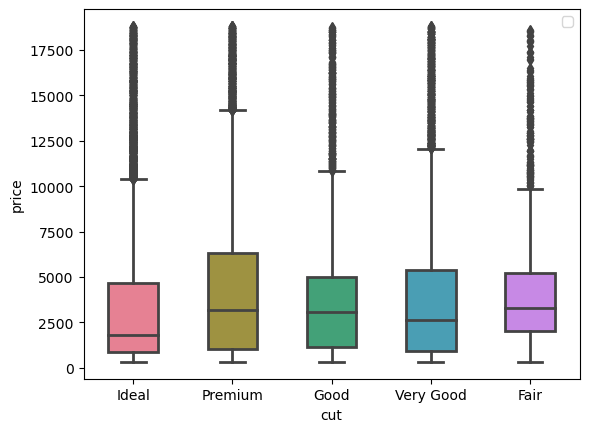

In [223]:
# Box plots => Box plots are used to visualize the distribution of a continuous variable by plotting key summary statistics
# Box plots are created using the sns.boxplot() function
# x => defines the x-axis variable
# y => defines the y-axis variable
# data => defines the DataFrame
# hue => allows us to define a categorical variable
# palette => allows us to define the color palette
# dodge => allows us to separate the box plots
# linewidth => allows us to define the line width
# width => allows us to define the box width

# Shows the distribution of the price of diamonds
# sns.boxenplot(x="price", data=diamonds_df)
# Shows the distribution of the price of diamonds by cut
sns.boxplot(x="cut", y="price", data=diamonds_df, palette="husl", dodge=True, linewidth=2, width=0.5)
plt.legend(bbox_to_anchor=(1, 1))

<Axes: xlabel='cut', ylabel='price'>

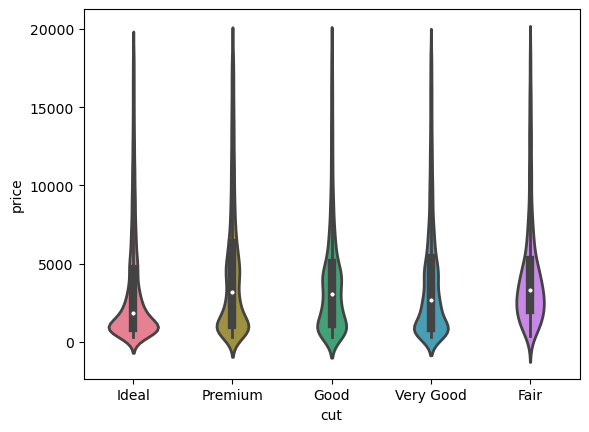

In [224]:
# violin plots
# Violin plots are used to visualize the distribution of a continuous variable
# Violin plots are created using the sns.violinplot() function
# x => defines the x-axis variable
# y => defines the y-axis variable

sns.violinplot(x="cut", y="price", data=diamonds_df, palette="husl", dodge=True, linewidth=2, width=0.5)

<Axes: xlabel='carat', ylabel='price'>

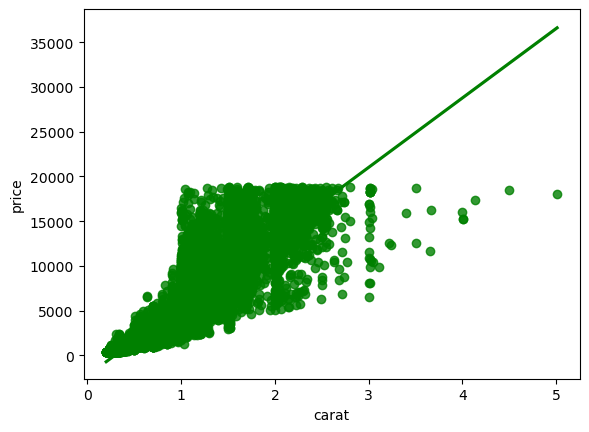

In [227]:
# reg plots
# Reg plots are used to visualize the relationship between two continuous variables
# Reg plots are created using the sns.regplot() function

# creates a scannter plot with a regression line
sns.regplot(x="carat", y="price", data=diamonds_df, color="green")

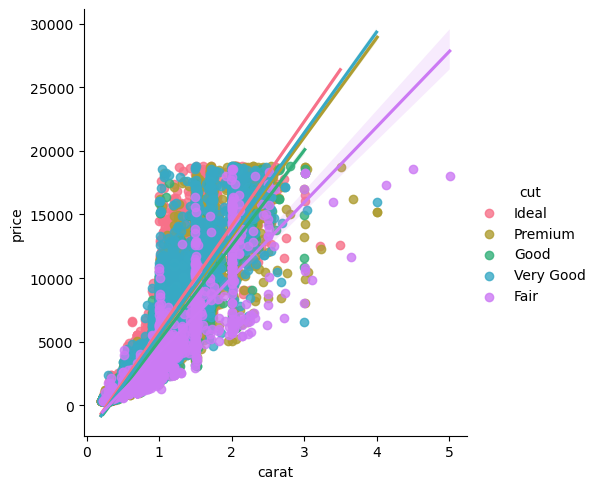

In [228]:
# lmplot => let's you explore the impact of other variable on the relationship between two continuous variables
# creates a scatter plot for caret and price with a regression line for each cut
sns.lmplot(x="carat", y="price", data=diamonds_df, hue="cut", palette="husl")

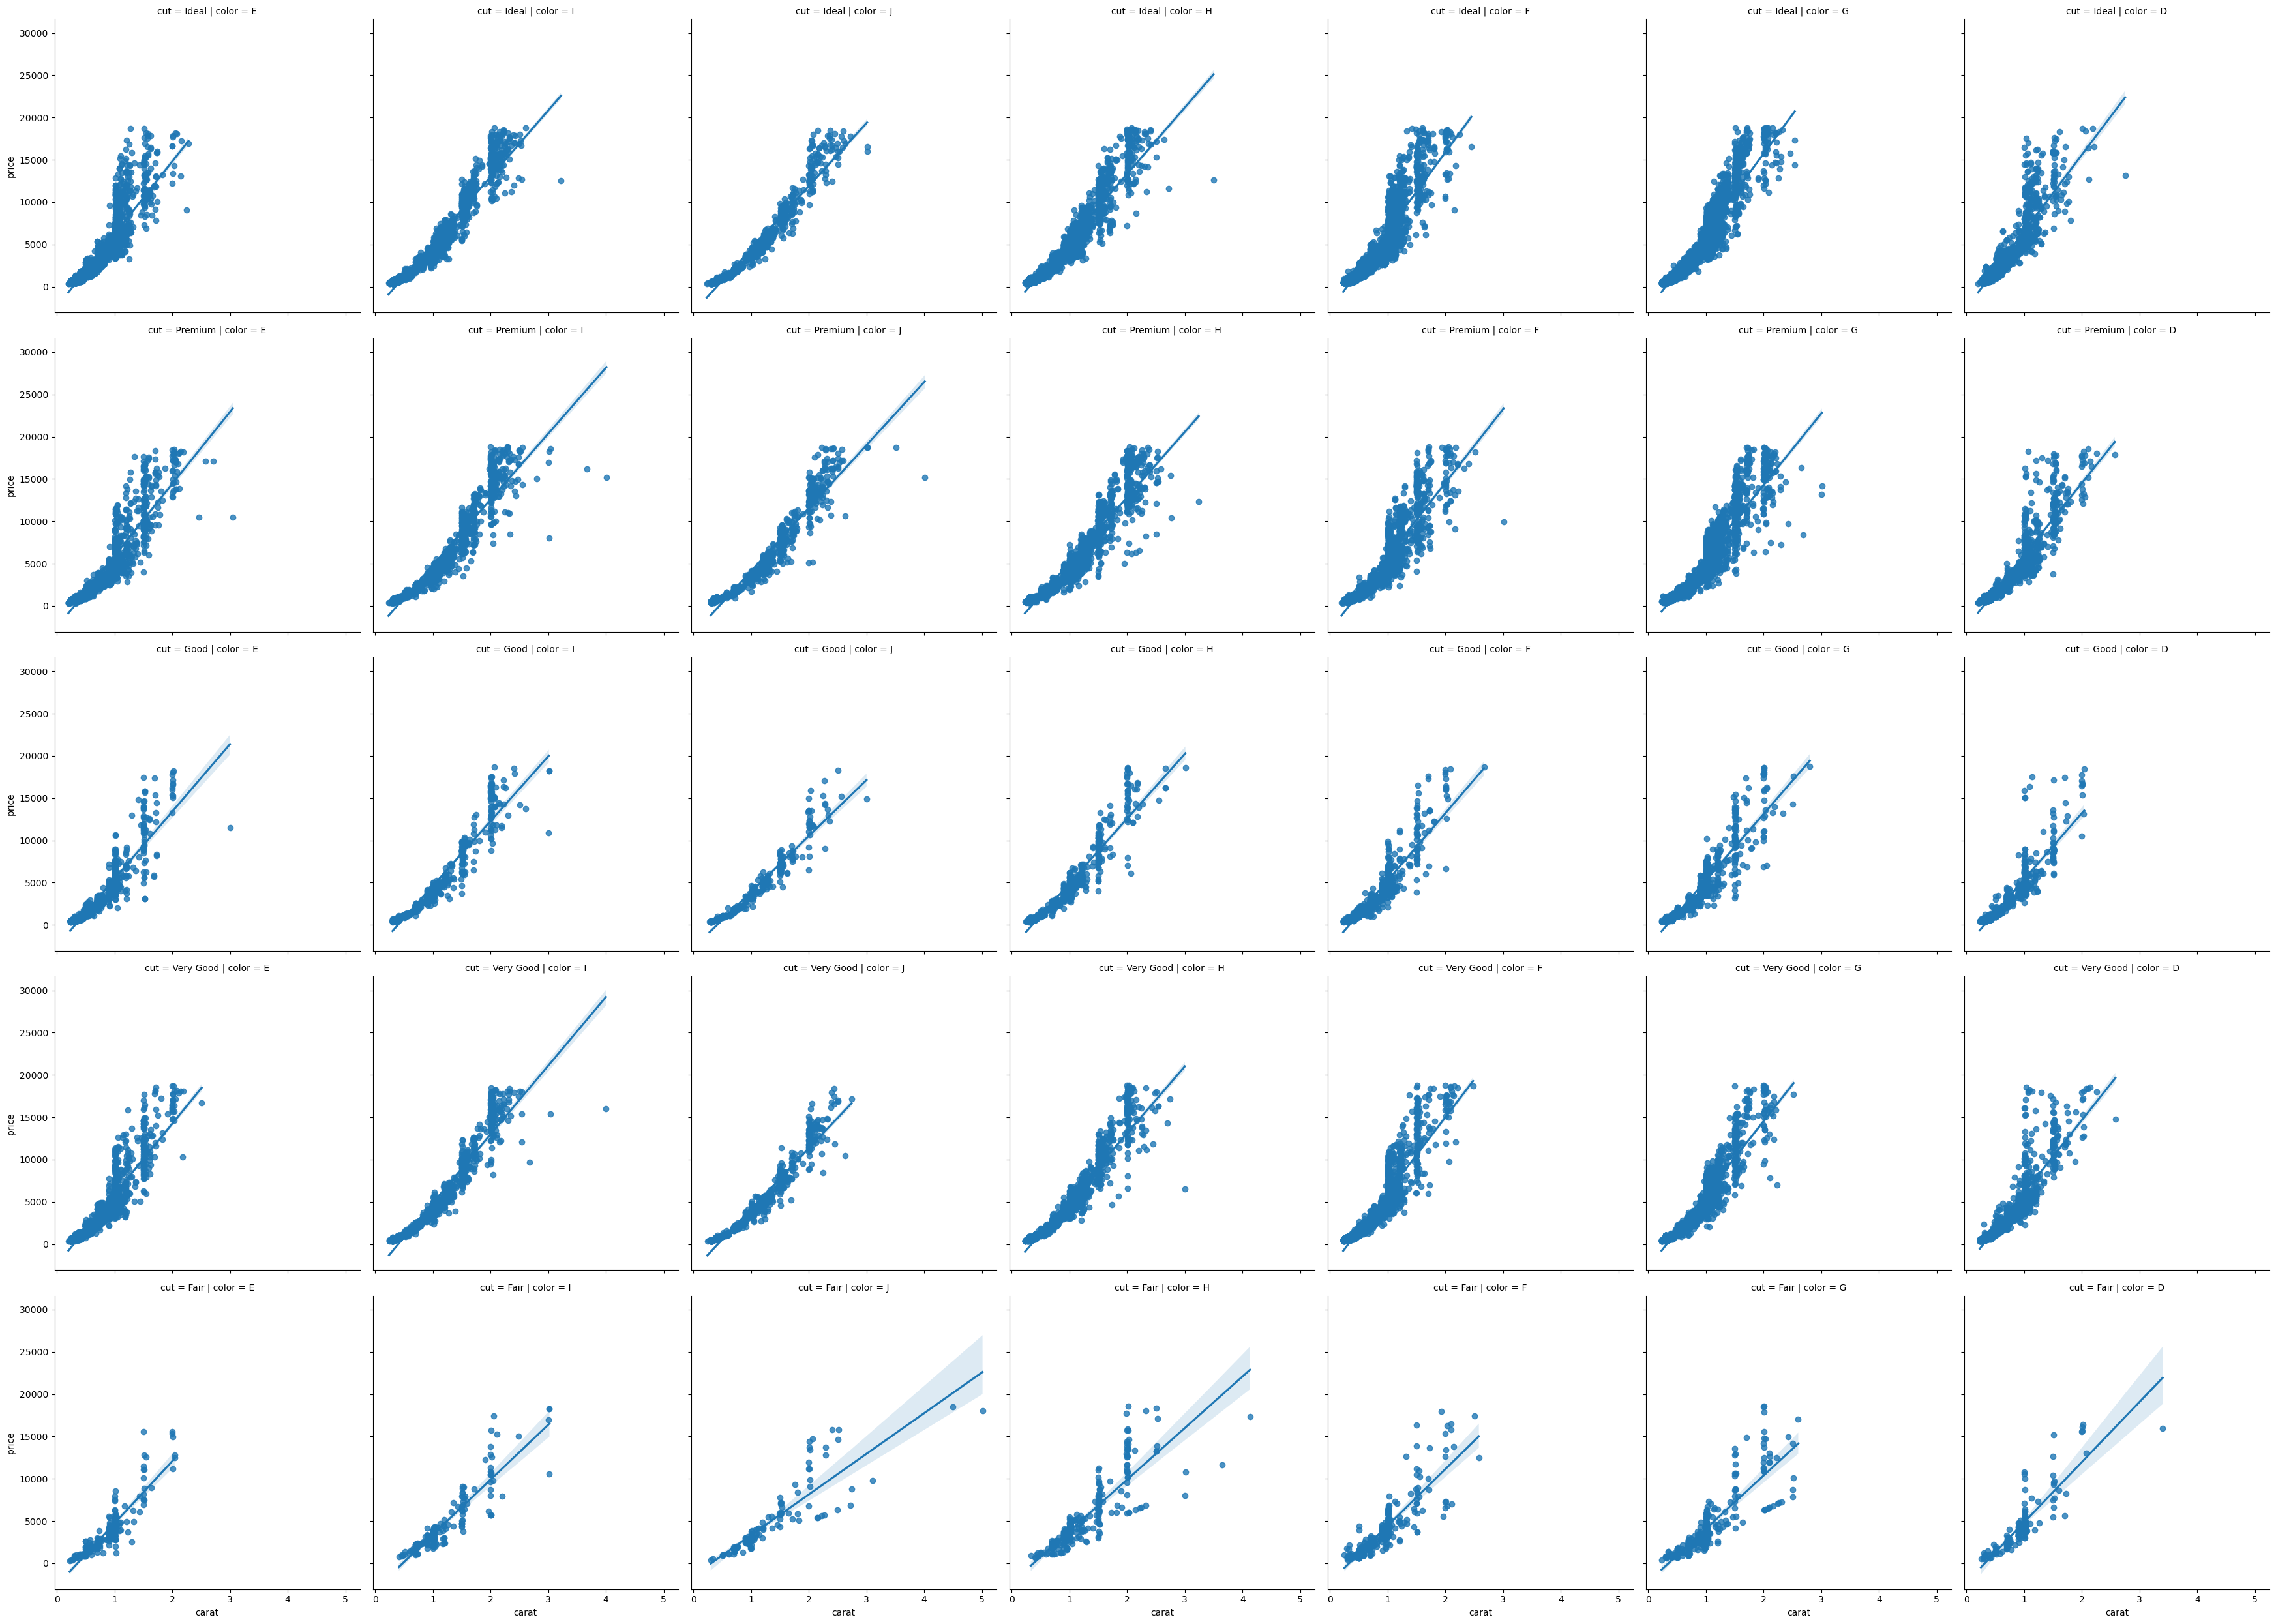

In [229]:
# One other capability of lm plots is it creates a matrix of linear relationships based on other catagorical variables

# creates a matrix of scatter plots for carat and price based on the cut and color of the diamonds
sns.lmplot(x="carat", y="price", data=diamonds_df, row="cut", col="color", palette="husl")

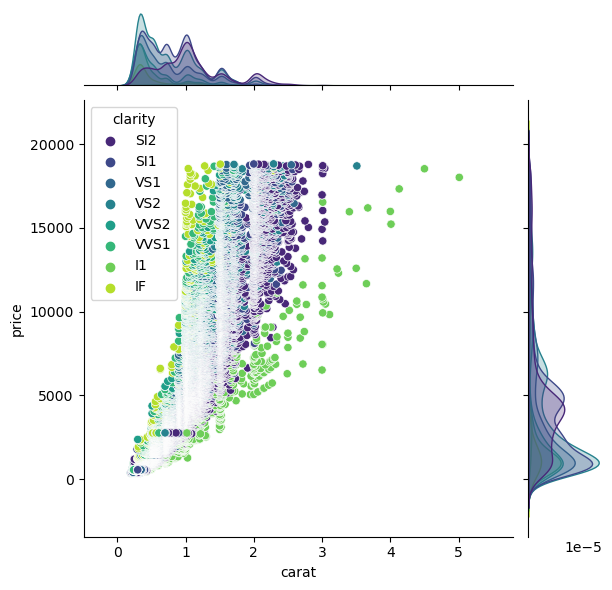

In [244]:
# join plots => creates a scatter plot and adds the distribution of each variable
# creates a scatter plot for carat and price with the distribution of each variable

# kind => allows us to define the type of plot to be created (scatter, reg, resid, kde, hex)
# hue => allows us to define a categorical variable
sns.jointplot(x="carat", y="price", data=diamonds_df, hue="clarity", kind="scatter", palette="viridis")

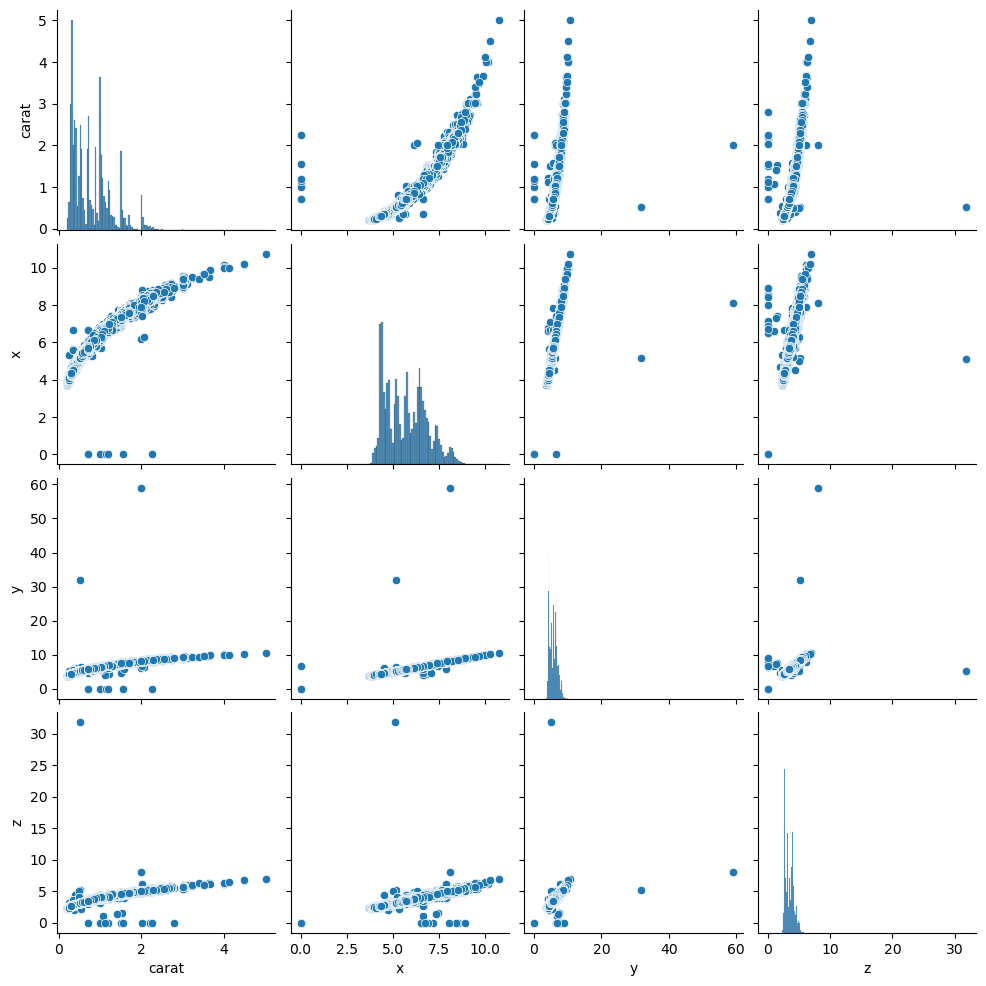

In [249]:
# pair plots => creates a matrix of scatter plots for all the numerical variables in the DataFrame

sns.pairplot(diamonds_df.loc[:, ['carat', 'x', 'y', 'z']])

<Axes: xlabel='color', ylabel='clarity'>

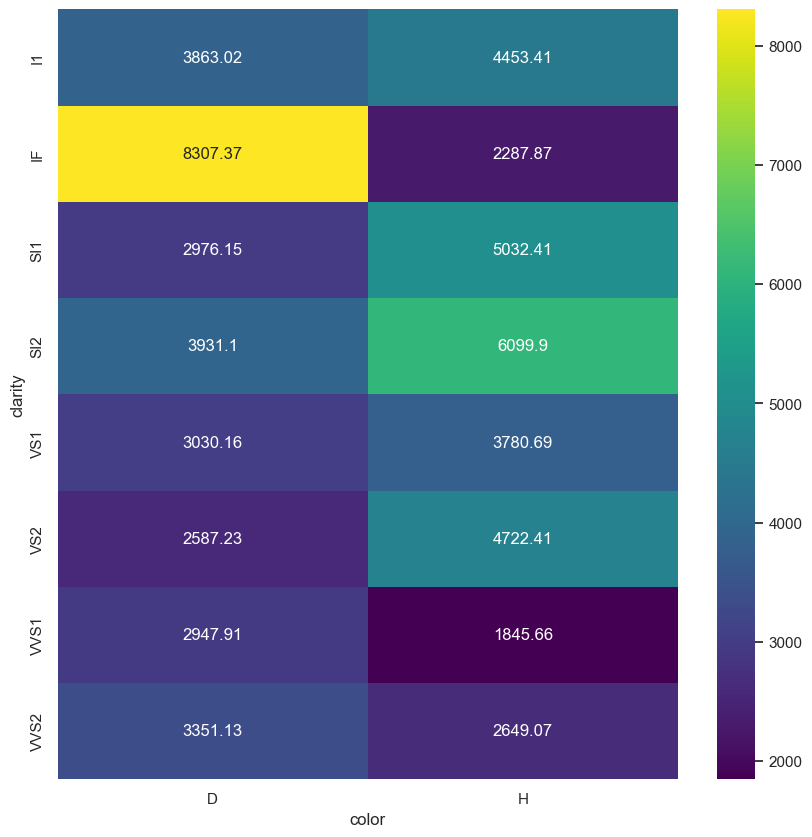

In [259]:
# Heatmaps => Heatmaps are used to visualize the relationship between two categorical variables
# Heatmaps are created using the sns.heatmap() function

# x => defines the x-axis variable
# y => defines the y-axis variable
# data => defines the DataFrame

diamond_pivot = diamonds_df.pivot_table(index="clarity", columns="color", values="price", aggfunc="mean")

sns.set(rc={'figure.figsize':(10, 10)})
# creates a heatmap for the price of diamonds based on the clarity and color
sns.heatmap(diamond_pivot.loc[:, ['D', 'H']], cmap="viridis", annot=True, fmt="g")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


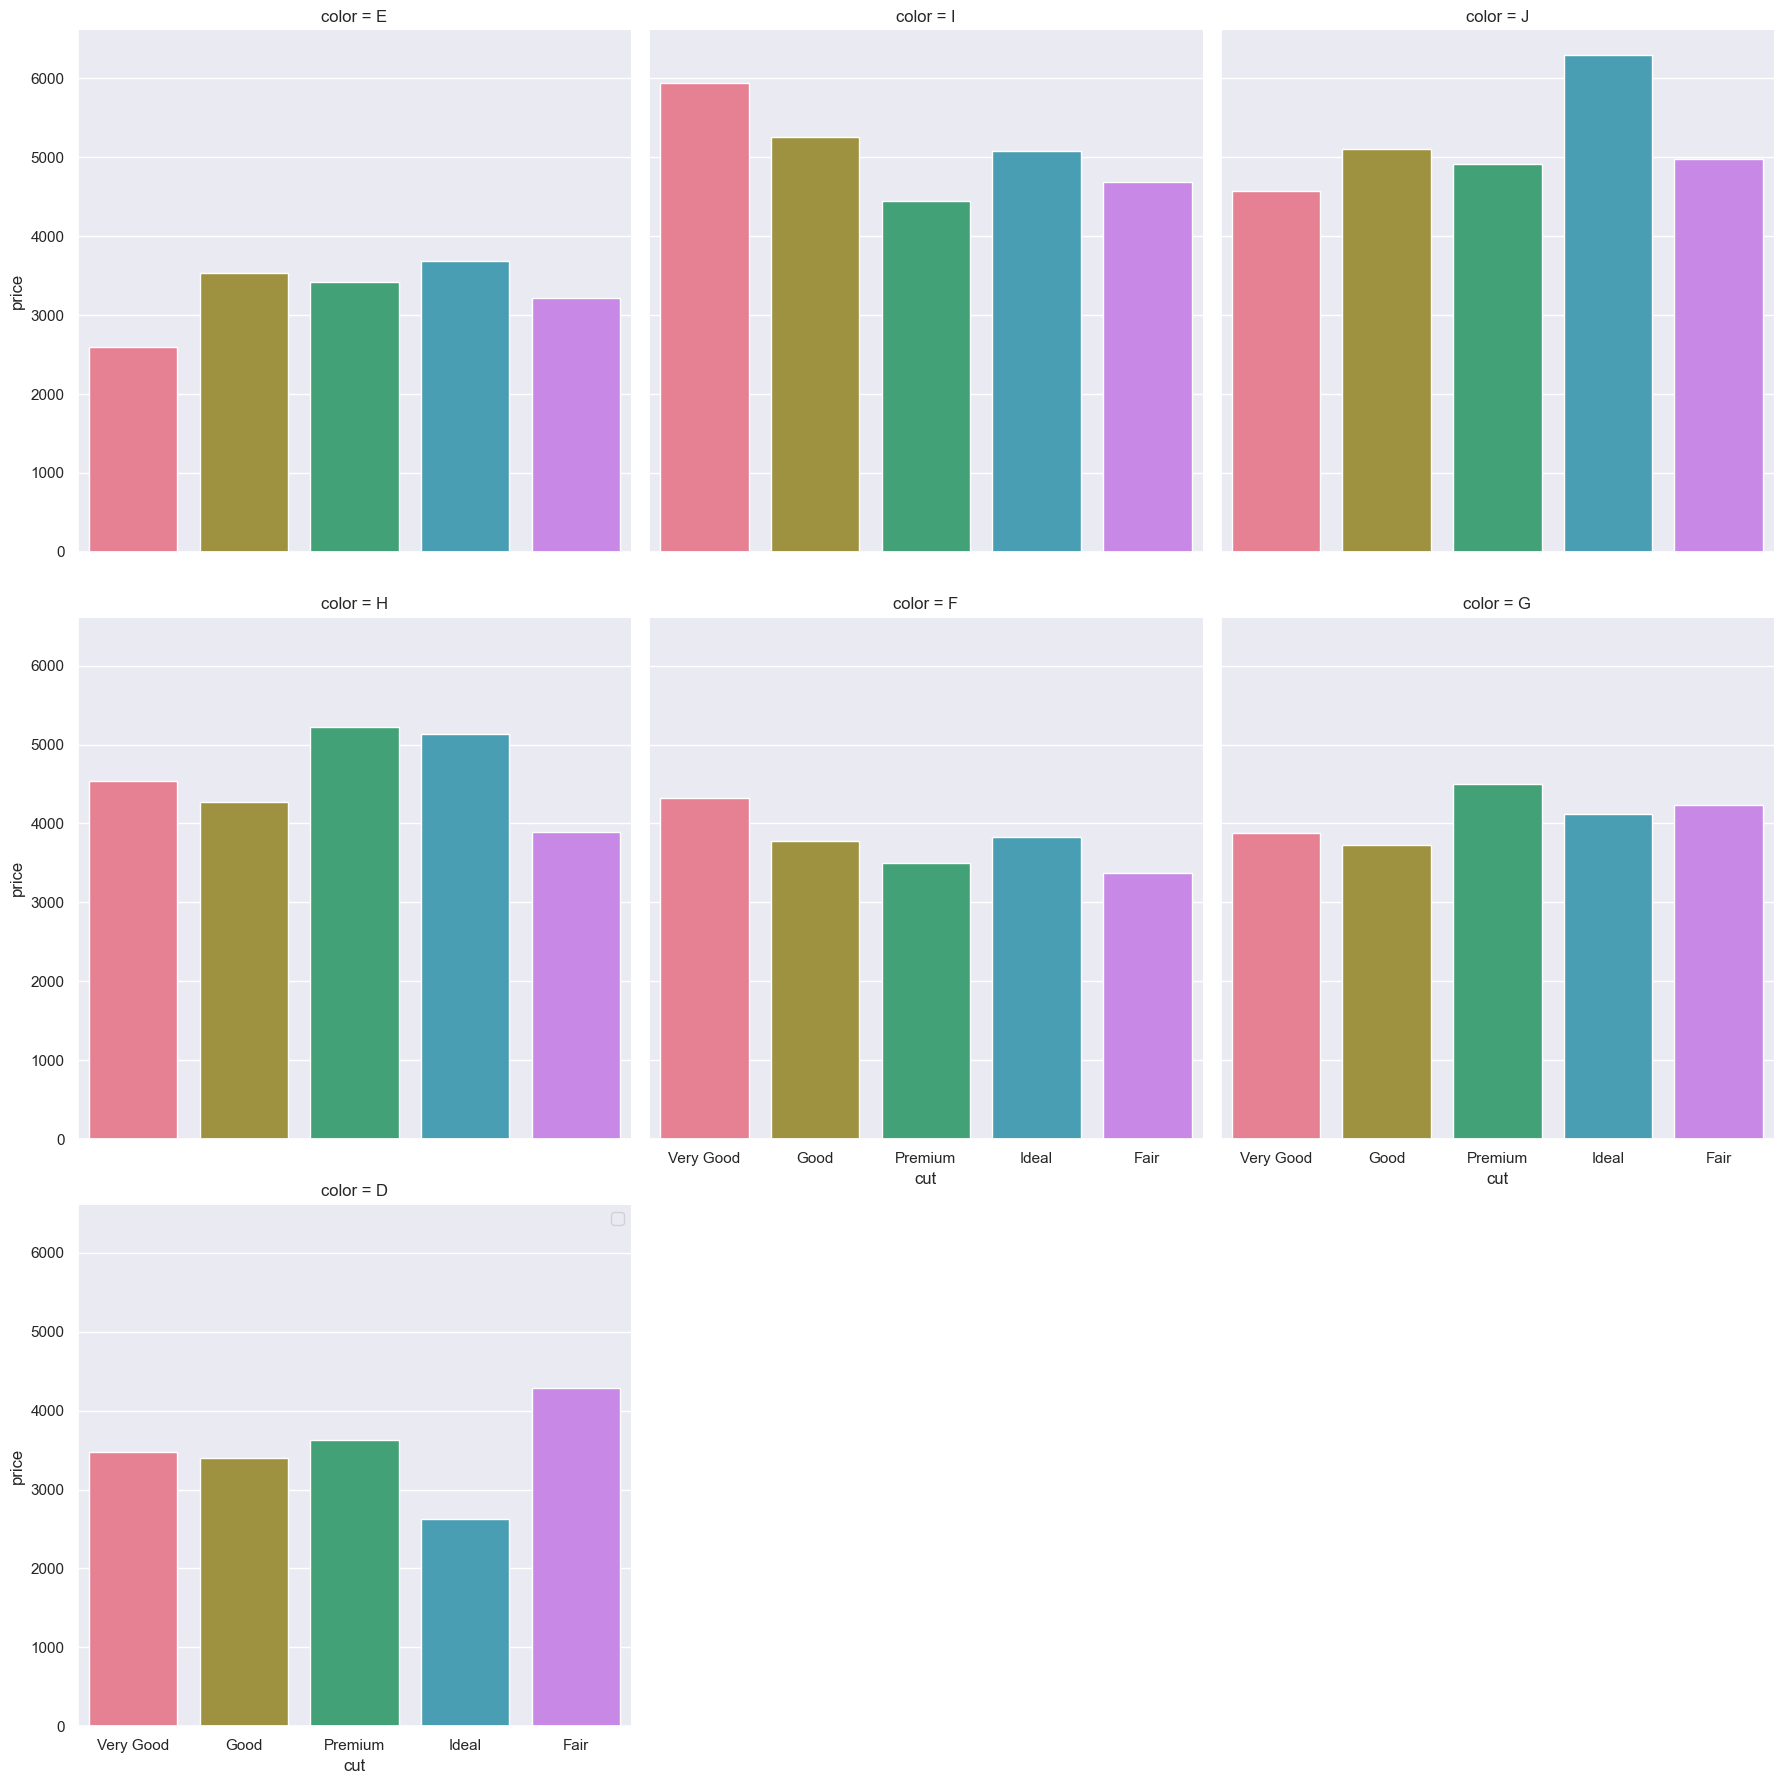

In [278]:
## FacetGrid
# FacetGrid is used to create a grid of plots based on a categorical variable

# price distribution of diamonds based on the color
# separate subplot for each color
# colwrap => allows us to define the number of columns in the grid
sns.set(rc={'figure.figsize':(15, 10)})
g = sns.FacetGrid(diamonds_df, col="color", col_wrap=3, height=6)
g.map_dataframe(sns.barplot, x="cut", y="price", errorbar=None, palette="husl")
# set the legend outside the plot
plt.legend(bbox_to_anchor=(1, 1))

Text(0, 0.5, 'Price')

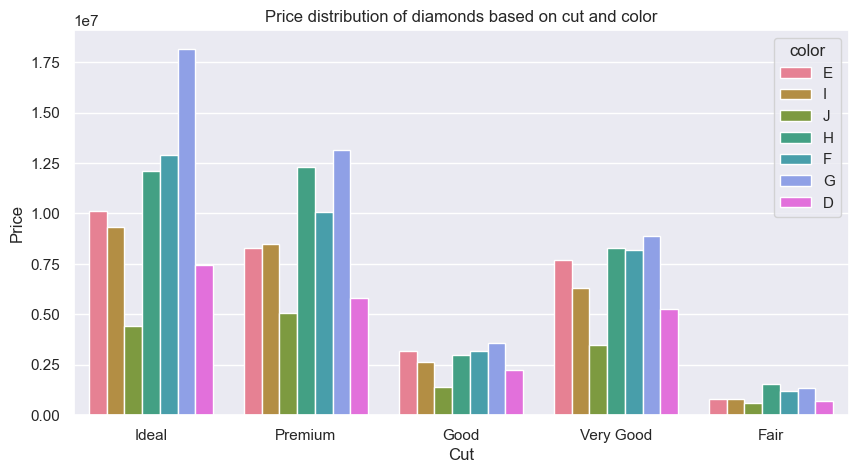

In [279]:
# matplot lib integration
# you can build seaborn plots in matplotlib objects, which lets you customize and integrate seaborn charts as if they were built using matplotlib
# create a figure and axis

fig, ax = plt.subplots(figsize=(10, 5))

sns.set_style("darkgrid")

sns.barplot(x="cut", y="price", data=diamonds_df, estimator=sum, hue="color", palette="husl", errorbar=None)

# set the title
ax.set_title("Price distribution of diamonds based on cut and color")
# set x label
ax.set_xlabel("Cut")
# set y label
ax.set_ylabel("Price")

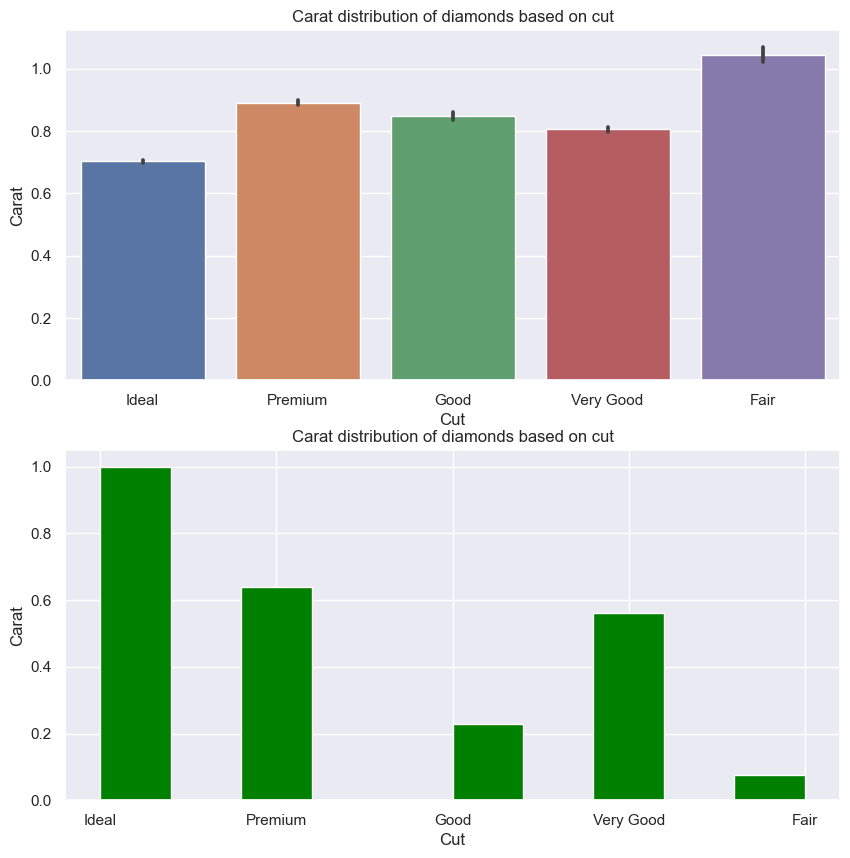

In [280]:
# subplots using seaborn and matplotlib integration
fix, ax = plt.subplots(2,1, figsize=(10, 10))

sns.set_style("darkgrid")

sns.barplot(x="cut", y="carat", data=diamonds_df, ax=ax[0])

# set the title
ax[0].set_title("Carat distribution of diamonds based on cut")
# set x label
ax[0].set_xlabel("Cut")
# set y label
ax[0].set_ylabel("Carat")

ax[1].hist(diamonds_df["cut"], bins=10, color="green", density=True)
ax[1].set_title("Carat distribution of diamonds based on cut")
ax[1].set_xlabel("Cut")
ax[1].set_ylabel("Carat")

fig.tight_layout()